#Lagrangian Method (scipy.linalg.solve)

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

#Define the matrix A and the vector b and the scalar c
A = np.array([[13, 5], [5, 7]])
b = np.array([1, 1])
c = 2

#I need to define the partial derivatives coefficients matrix to define the same
#system of equations I've already solved in the Q1_3_Assignment2.pdf file and also
#the known terms vector
M = np.array([
    [2 * A[0, 0], 2 * A[0, 1], 2, 1],  #Derivative with respect to x1
    [2 * A[1, 0], 2 * A[1, 1], -5, 1],  #Derivative with respect to x2
    [2, -5, 0, 0],  #g(x): 2x1 - 5x2 = 2
    [1, 1, 0, 0]   #h(x): x1 + x2 = 1
])

kt = np.array([-b[0], -b[1], 2, 1])

In [2]:
#Solve the equation system
solution = la.solve(M, kt)

#Save and print the results
optimal_x1, optimal_x2, optimal_lambda1, optimal_lambda2 = solution

print(f"Optimal x1: {optimal_x1}")
print(f"Optimal x2: {optimal_x2}")
print(f"Lambda1: {optimal_lambda1}")
print(f"Lambda2: {optimal_lambda2}")

Optimal x1: 0.9999999999999998
Optimal x2: -1.7494423418335802e-16
Lambda1: -2.2857142857142856
Lambda2: -22.428571428571423


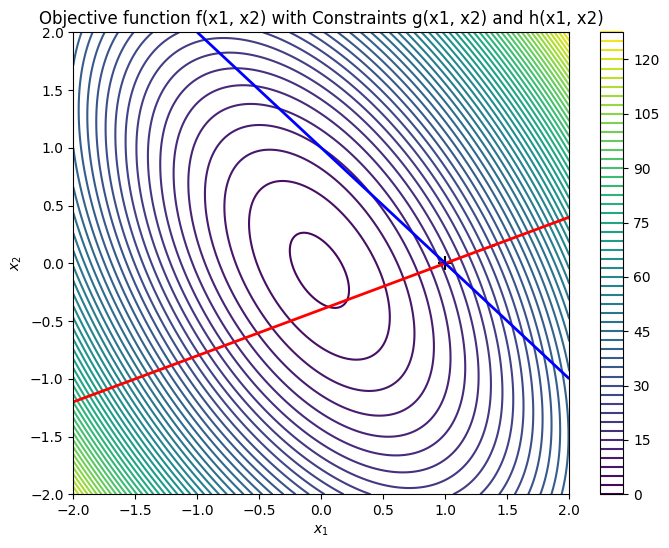

In [3]:
#x1 and x2 domain
x1_domain = np.linspace(-2, 2, 400)
x2_domain = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1_domain, x2_domain)

#Compute f(x1, x2)
F = X1 * (A[0, 0] * X1 + A[0, 1] * X2) + X2 * (A[1, 0] * X1 + A[1, 1] * X2) + b[0] * X1 + b[1] * X2 + c

#Compute constraints g(x1, x2) and h(x1, x2)
G = 2 * X1 - 5 * X2 - 2
H = X1 + X2 - 1

#Plotting
plt.figure(figsize=(8, 6))

#f(x1, x2) plot
contour = plt.contour(X1, X2, F, levels=50, cmap='viridis')
plt.colorbar(contour)

#g(x1, x2) plot
plt.contour(X1, X2, G, levels=[0], colors='red', linestyles='solid', linewidths=2)

#h(x1, x2) plot
plt.contour(X1, X2, H, levels=[0], colors='blue', linestyles='solid', linewidths=2)

#Optimal
plt.scatter(optimal_x1, optimal_x2, color='black', marker='+', s=100, label='Optimal Point')

#Title and description
plt.title('Objective function f(x1, x2) with Constraints g(x1, x2) and h(x1, x2)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

The point marked with the '+' is the Optimal Point where g(x1, x2) = 0, in red, and h(x1, x2) = 0, in blue, intersect.

Results:
* Optimal x1: 0.9999999999999998
* Optimal x2: -1.7494423418335802e-16
* λ1: -2.2857142857142856
* λ2: -22.428571428571423

#Solving using scipy optimize

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#Define the matrix A and the vector b and the scalar c
A = np.array([[13, 5], [5, 7]])
b = np.array([1, 1])
c = 2

#Objective function f(x1, x2)
def objective(x):
    x1, x2 = x
    return x1 * (A[0, 0] * x1 + A[0, 1] * x2) + x2 * (A[1, 0] * x1 + A[1, 1] * x2) + b[0] * x1 + b[1] * x2 + c

#Constraints g(x1, x2) and h(x1, x2)
def constraintG(x):
    x1, x2 = x
    return 2 * x1 - 5 * x2 - 2

def constraintH(x):
    x1, x2 = x
    return x1 + x2 - 1

In [ ]:
#Contstraint
constraints = [{'type': 'eq', 'fun': constraintG}, {'type': 'eq', 'fun': constraintH}]

#Initialization point
x0 = [0.5, 0.5]

#Solving using scipy optimize and the method 'SLSQP' Sequential Least Squares Programming,
#Indeed, this method is well-suited for optimization problems with constraints
#(both equality and inequality).
#It offers a good balance between speed and handling of non-linear constraints.
solution = minimize(objective, x0, method='SLSQP', constraints=constraints)

#Save and print the results
optimal_x1, optimal_x2 = solution.x

print(f"Optimal x1: {optimal_x1}")
print(f"Optimal x2: {optimal_x2}")

Optimal x1: 0.9999999999999999
Optimal x2: 1.6653345369377348e-16


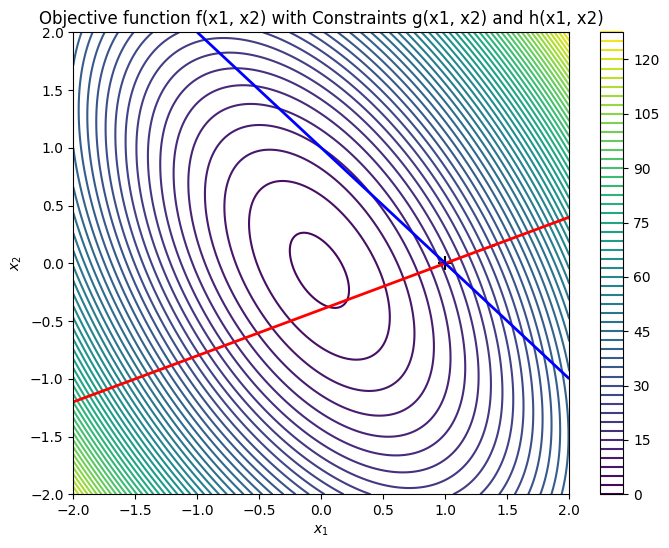

In [ ]:
#x1 and x2 domain
x1_domain = np.linspace(-2, 2, 400)
x2_domain = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1_domain, x2_domain)

#Compute f(x1, x2)
F = X1 * (A[0, 0] * X1 + A[0, 1] * X2) + X2 * (A[1, 0] * X1 + A[1, 1] * X2) + b[0] * X1 + b[1] * X2 + c

#Compute constraints g(x1, x2) and h(x1, x2)
G = 2 * X1 - 5 * X2 - 2
H = X1 + X2 - 1

#Plotting
plt.figure(figsize=(8, 6))

#f(x1, x2) plot
contour = plt.contour(X1, X2, F, levels=50, cmap='viridis')
plt.colorbar(contour)

#g(x1, x2) plot
plt.contour(X1, X2, G, levels=[0], colors='red', linestyles='solid', linewidths=2)

#h(x1, x2) plot
plt.contour(X1, X2, H, levels=[0], colors='blue', linestyles='solid', linewidths=2)

#Optimal
plt.scatter(optimal_x1, optimal_x2, color='black', marker='+', s=100, label='Optimal Point')

#Title and description
plt.title('Objective function f(x1, x2) with Constraints g(x1, x2) and h(x1, x2)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()